<a href="https://colab.research.google.com/github/UlrikN1234/BDS2024/blob/main/BDS2024_Data_handling_introduction_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Data loading and overview

Research Question:
"How much and for how long do countries borrow in total, on average and also split by sector from KIVA, and how do these loans correlate with the term in months?"


Theory:
This research question explores the relationship between loan characteristics (amount and duration), demographics (country and gender) on the Kiva platform. By analyzing these factors, we gain insights into lending patterns across countries and sectors, and how loan characteristics relate to loan durations.





In [50]:
#Importing and installing the necessary libraries & packages
!pip install pyarrow

import numpy as np
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

from zipfile import ZipFile
from io import BytesIO
import requests
import matplotlib.ticker as mticker
from collections import Counter


In [51]:
#Loading the datasets from Github
url_0 = "https://raw.githubusercontent.com/aaubs/ds-master/main/data/assignments_datasets/KIVA/kiva_loans_part_0.csv.zip"
df_0 = pd.read_csv(ZipFile(BytesIO(requests.get(url_0).content)).open("kiva_loans_part_0.csv"))

url_1 = "https://raw.githubusercontent.com/aaubs/ds-master/main/data/assignments_datasets/KIVA/kiva_loans_part_1.csv.zip"
df_1 = pd.read_csv(ZipFile(BytesIO(requests.get(url_1).content)).open("kiva_loans_part_1.csv"))

url_2 = "https://raw.githubusercontent.com/aaubs/ds-master/main/data/assignments_datasets/KIVA/kiva_loans_part_2.csv.zip"
df_2 = pd.read_csv(ZipFile(BytesIO(requests.get(url_2).content)).open("kiva_loans_part_2.csv"))

In [52]:
#Checking the columns of the datasets to get a quick overview
print(df_0.columns)
print(df_1.columns)
print(df_2.columns)

Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date'],
      dtype='object')
Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date'],
      dtype='object')
Index(['id', 'funded_amount', 'loan_amount', 'activity', 'sector', 'use',
       'country_code', 'country', 'region', 'currency', 'partner_id',
       'posted_time', 'disbursed_time', 'funded_time', 'term_in_months',
       'lender_count', 'tags', 'borrower_genders', 'repayment_interval',
       'date'],
      dtype='object')


In [53]:
#Mergering the 3 different datasets and previewing the mergered data
df_merged = pd.concat([df_0, df_1, df_2])
df_merged.head(10)


,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01
5,1080148,250.0,250.0,Services,Services,purchase leather for my business using ksh 20000.,KE,Kenya,NaN,KES,NaN,2014-01-01 10:06:19+00:00,2014-01-30 01:42:48+00:00,2014-01-29 14:14:57+00:00,4.0,6,NaN,female,irregular,2014-01-01
6,653067,200.0,200.0,Dairy,Agriculture,To purchase a dairy cow and start a milk produ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:51:02+00:00,2013-12-16 08:00:00+00:00,2014-01-01 17:18:09+00:00,43.0,8,"user_favorite, user_favorite",female,bullet,2014-01-01
7,653078,400.0,400.0,Beauty Salon,Services,to buy more hair and skin care products.,PK,Pakistan,Ellahabad,PKR,245.0,2014-01-01 11:46:01+00:00,2013-12-20 08:00:00+00:00,2014-01-10 18:18:44+00:00,14.0,8,"#Elderly, #Woman Owned Biz",female,monthly,2014-01-01
8,653082,475.0,475.0,Manufacturing,Manufacturing,"to purchase leather, plastic soles and heels i...",PK,Pakistan,Lahore,PKR,245.0,2014-01-01 11:49:43+00:00,2013-12-20 08:00:00+00:00,2014-01-01 18:47:21+00:00,14.0,19,user_favorite,female,monthly,2014-01-01
9,653048,625.0,625.0,Food Production/Sales,Food,"to buy a stall, gram flour, ketchup, and coal ...",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 05:41:03+00:00,2013-12-17 08:00:00+00:00,2014-01-03 15:45:04+00:00,11.0,24,NaN,female,irregular,2014-01-01


In [54]:
# Checking the data types and missing values of the mergered dataset as well as calling summary statistics to get a further overview
df_merged.info()
df_merged.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 671205 entries, 0 to 221204
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  partner_id          657698 non-null  float64
 11  posted_time         671205 non-null  object 
 12  disbursed_time      668809 non-null  object 
 13  funded_time         622874 non-null  object 
 14  term_in_months      671205 non-null  float64
 15  lender_count        671205 non-null  in

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


## 2. Data Cleaning and manipulation

In [55]:
#Removing columns that will not be used for this analysis
df = df_merged.drop(['id', 'use', 'partner_id', 'posted_time', 'disbursed_time', 'funded_time', 'tags'], axis=1)

In [56]:
# Identify if the remaining column has missing values
df.isnull().sum()


,0
funded_amount,0
loan_amount,0
activity,0
sector,0
country_code,8
country,0
region,56800
currency,0
term_in_months,0
lender_count,0


In [57]:
# Fill missing regions with 'Unknown' and dropping rows with missing Borrower Gender & Country Code
df['region'].fillna('Unknown', inplace=True)
df.dropna(subset=['borrower_genders', 'country_code'], inplace=True)

In [58]:
df['borrower_genders'].value_counts()


,count
borrower_genders,
female,426498
male,134706
"female, female",12164
"female, female, female",11676
"female, female, female, female",9052
...,...
"male, female, female, female, male, female, female, female, male, female, female, male, female, female, female, female, female",1
"female, female, male, female, male, female, female, male, female, female, female, female, female, female, female, female, female, female",1
"male, female, female, male, female, female, female, male, female, male, female, female, female",1


In [59]:
#Using ChatGPT to help cleaning out the wierd gender observations
def clean_gender(gender_string):
    # Splits the string by commas to get a list of genders
    genders = gender_string.split(', ')

    # Counts the frequency of each gender
    gender_count = Counter(genders)

    # Returns the gender with the highest frequency
    return gender_count.most_common(1)[0][0]

# Applying the function to the 'borrower_genders' column
df['borrower_genders'] = df['borrower_genders'].apply(clean_gender)

# Verify the results by checking the value counts
df['borrower_genders'].value_counts()

,count
borrower_genders,
female,517588
male,149388


In [60]:
df.isnull().sum()

,0
funded_amount,0
loan_amount,0
activity,0
sector,0
country_code,0
country,0
region,0
currency,0
term_in_months,0
lender_count,0


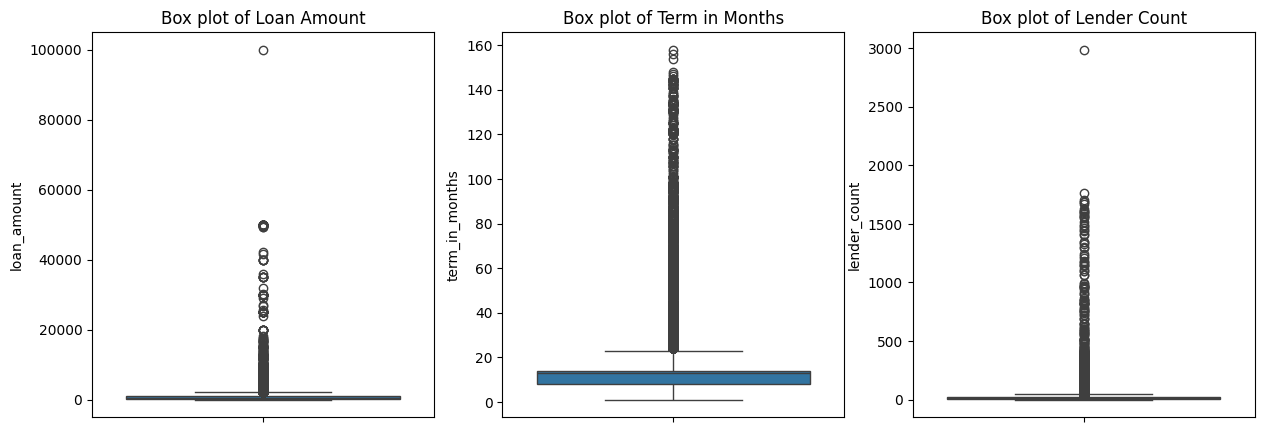

In [61]:
# Checking for outliers in both Loan Amount, Term in Months and Lender Count using a sns box plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(data=df, y='loan_amount', ax=axes[0]).set_title('Box plot of Loan Amount')
sns.boxplot(data=df, y='term_in_months', ax=axes[1]).set_title('Box plot of Term in Months')
sns.boxplot(data=df, y='lender_count', ax=axes[2]).set_title('Box plot of Lender Count')
plt.show()

In [62]:
# Calculating Z-scores for each column separately
z_scores_loan = zscore(df['loan_amount'])
z_scores_term = zscore(df['term_in_months'])
z_scores_lender = zscore(df['lender_count'])

# Identifying outliers where Z-scores are greater than 3 or less than -3 to get 95% of data within 2 standard deviations
df['outlier_loan_amount'] = (z_scores_loan > 3) | (z_scores_loan < -3)
df['outlier_term_in_months'] = (z_scores_term > 3) | (z_scores_term < -3)
df['outlier_lender_count'] = (z_scores_lender > 3) | (z_scores_lender < -3)

# Combine outliers from all columns
df['outlier'] = df['outlier_loan_amount'] | df['outlier_term_in_months'] | df['outlier_lender_count']

# Remove the rows with outliers
df = df[~df['outlier']]

# Drop the helper columns used for outlier identification
df = df.drop(columns=['outlier', 'outlier_loan_amount', 'outlier_term_in_months', 'outlier_lender_count'])

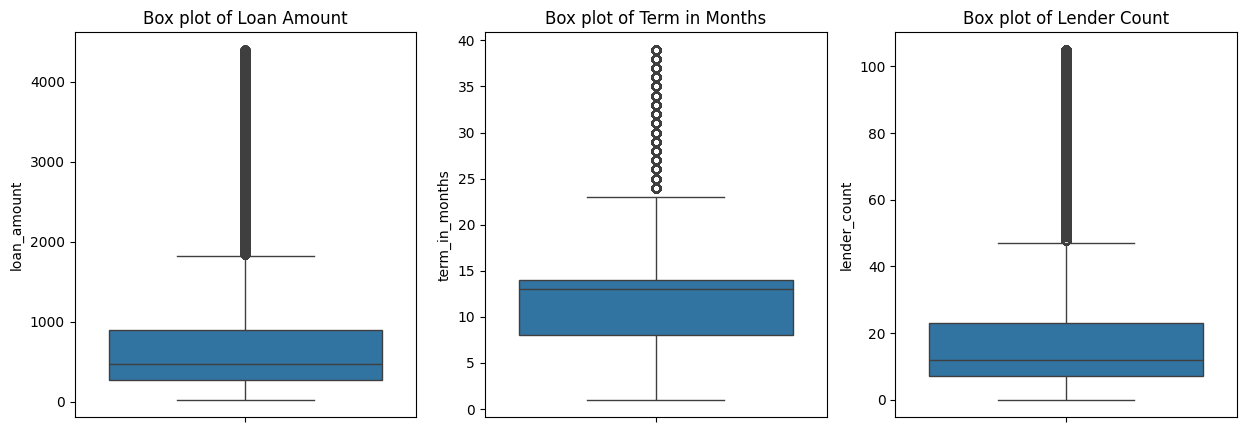

In [63]:
# Checking the boxplots again to make sure outliers has been removed, and getting the cleaned overview
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(data=df, y='loan_amount', ax=axes[0]).set_title('Box plot of Loan Amount')
sns.boxplot(data=df, y='term_in_months', ax=axes[1]).set_title('Box plot of Term in Months')
sns.boxplot(data=df, y='lender_count', ax=axes[2]).set_title('Box plot of Lender Count')
plt.show()

## 3. Descriptive Statistics

In [64]:
# Descriptive statistics for loan amounts
loan_stats = df['loan_amount'].describe()
loan_stats

# Calculating mean, median, std. deviation and variance for loan amount
mean_loan = df['loan_amount'].mean()
median_loan = df['loan_amount'].median()
std_loan = df['loan_amount'].std()
variance_loan = df['loan_amount'].var()

print("Mean:", mean_loan)
print("Median:", median_loan)
print("Std. Deviation:", std_loan)
print("Variance:", variance_loan)


Mean: 690.7948603288621
Median: 475.0
Std. Deviation: 656.5318679126707
Variance: 431034.09358490043


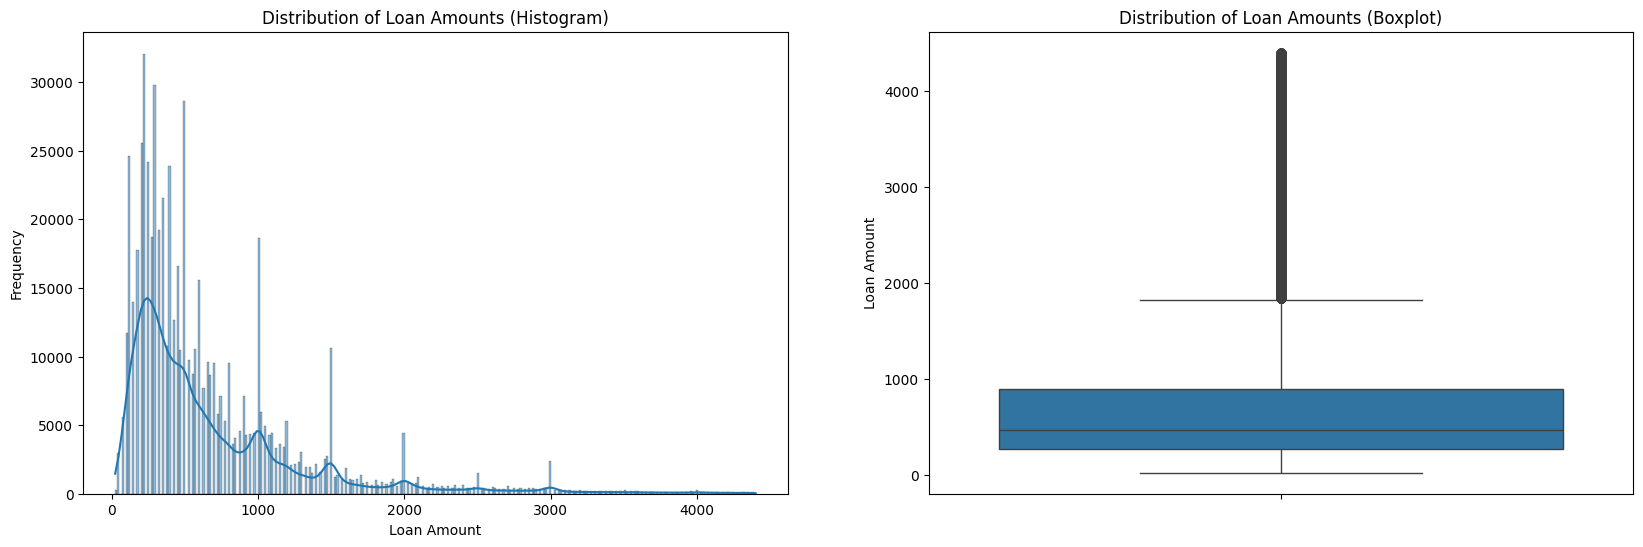

In [65]:
# Plotting the distribution of Loan Amounts
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.histplot(df['loan_amount'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Loan Amounts (Histogram)')
axes[0].set_xlabel('Loan Amount')
axes[0].set_ylabel('Frequency')

sns.boxplot(y=df['loan_amount'], ax=axes[1])
axes[1].set_title('Distribution of Loan Amounts (Boxplot)')
axes[1].set_ylabel('Loan Amount')

plt.show()

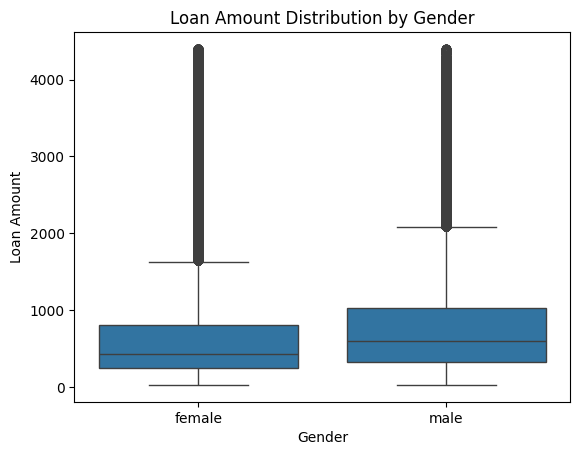

In [66]:
# Creating box plot of the Loan Amount by Gender
sns.boxplot(x='borrower_genders', y='loan_amount', data=df)
plt.xlabel('Gender')
plt.ylabel('Loan Amount')
plt.title('Loan Amount Distribution by Gender')
plt.show()

## 4. Exploratory data analysis and visualization

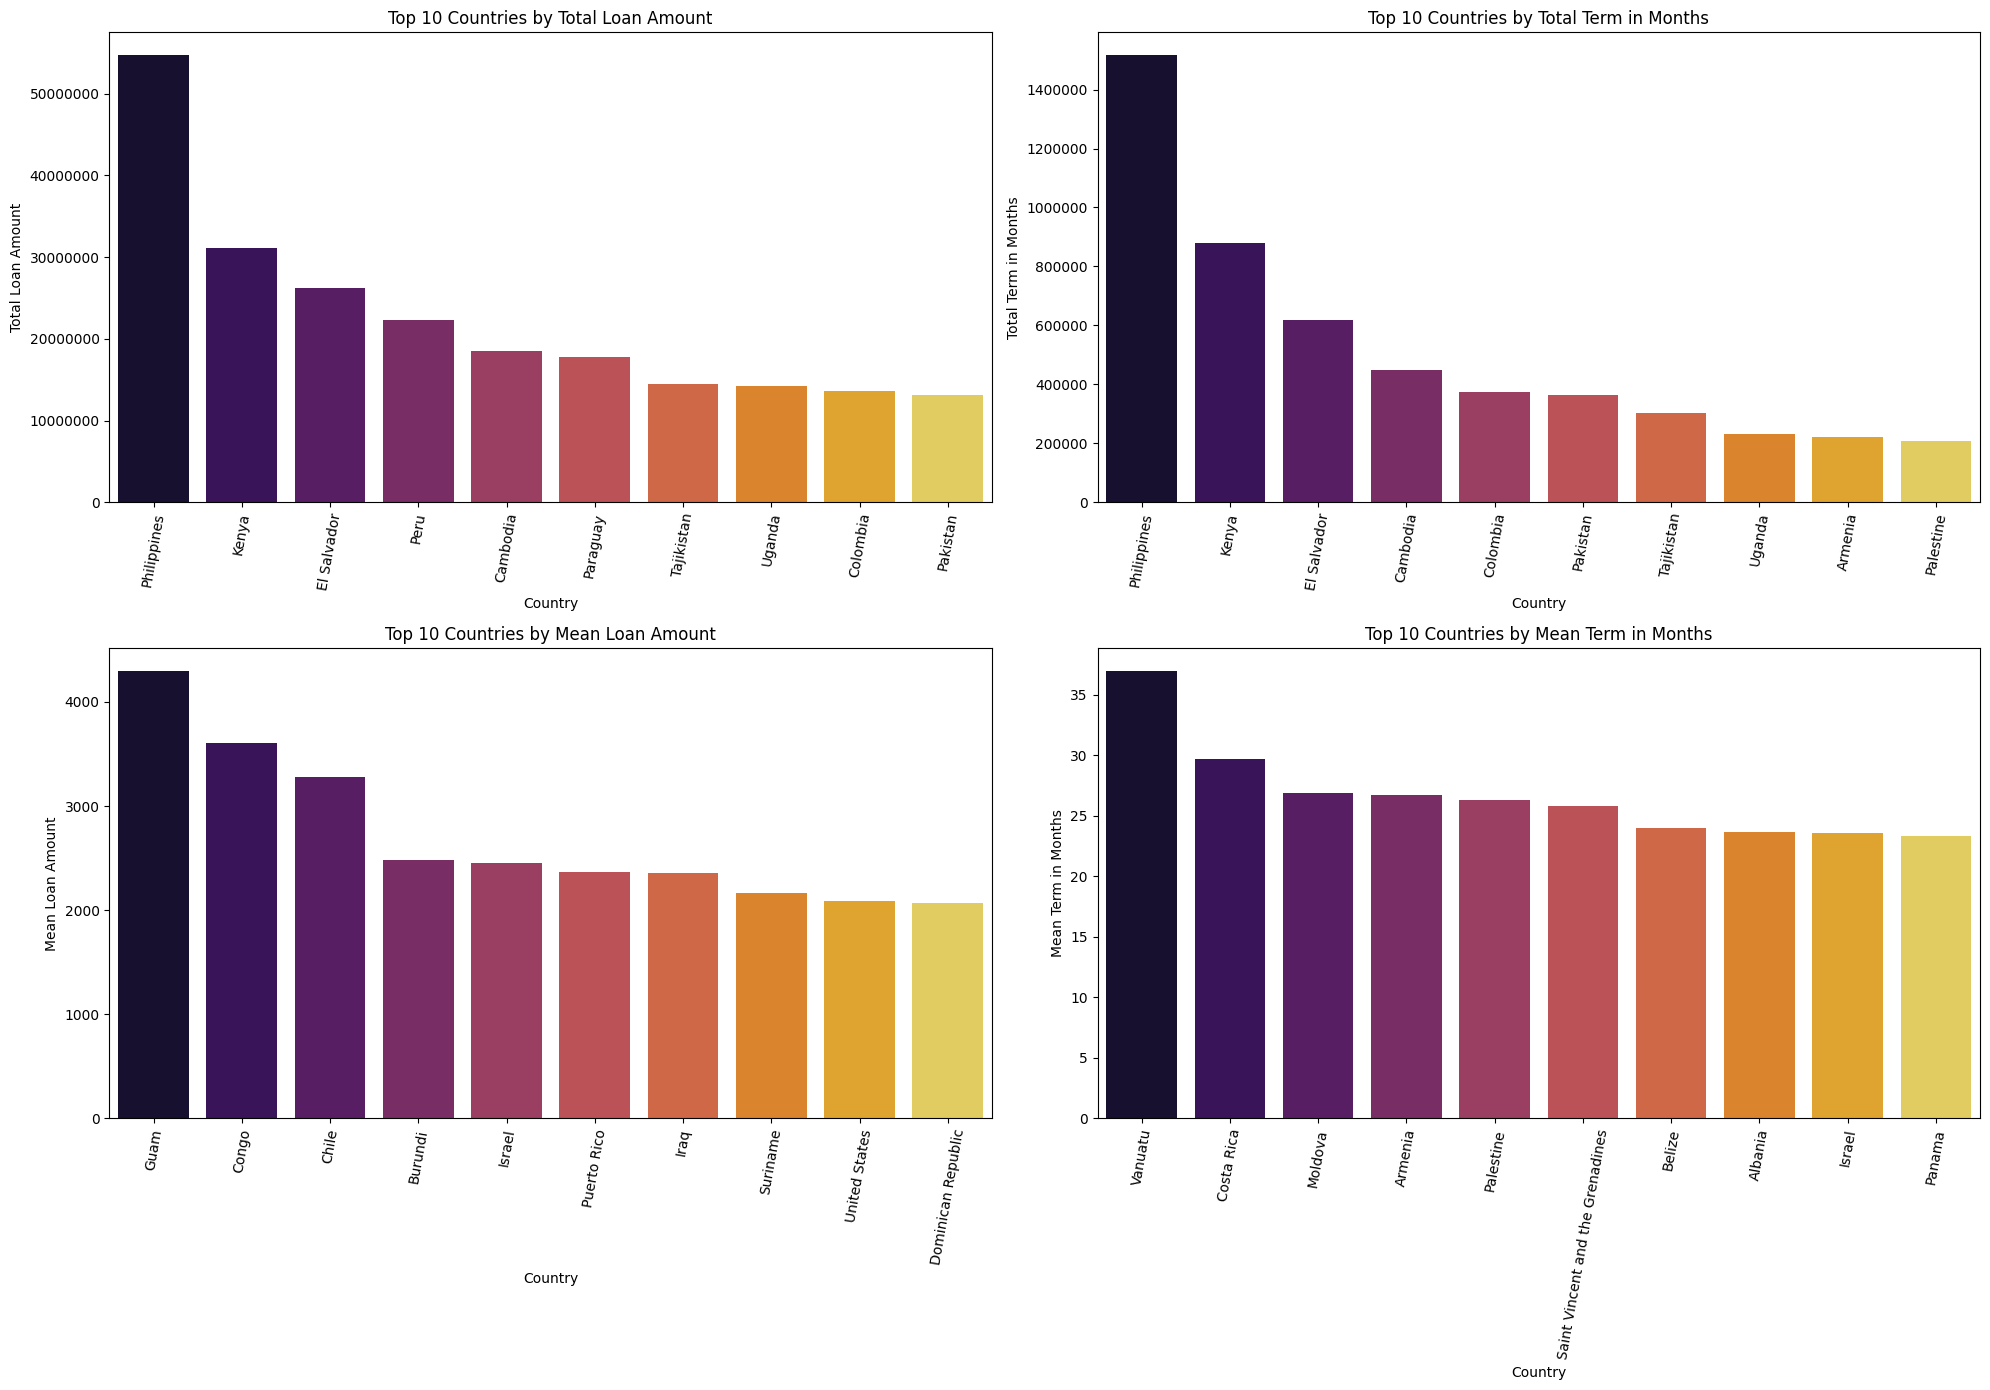

In [67]:
# Aggregating data by country for both mean and sum on Loan Amount and Term in Months
country_summary = df.groupby('country').agg({'loan_amount': ['mean', 'sum'], 'term_in_months': ['mean', 'sum']})

# Renaming the column names after aggregation
country_summary.columns = ['mean_loan_amount', 'sum_loan_amount', 'mean_term_in_months', 'sum_term_in_months']

# Creating top 10 pandas series with both mean and sum for Loan Amount and Term in Months
top_10_contries_mean_loan_amount = country_summary.nlargest(10, 'mean_loan_amount')
top_10_contries_sum_loan_amount = country_summary.nlargest(10, 'sum_loan_amount')
top_10_contries_mean_term_in_months = country_summary.nlargest(10, 'mean_term_in_months')
top_10_contries_sum_term_in_months = country_summary.nlargest(10, 'sum_term_in_months')

# Creating a figure with four subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 14))

# Disabling scientific notation in the axis notation
for ax in axes.flat:
    ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
    ax.ticklabel_format(style='plain', axis='y')

# Plotting top 10 countries by sum loan amount
sns.barplot(x='country', y='sum_loan_amount', hue='country', data=top_10_contries_sum_loan_amount, palette='inferno', ax=axes[0, 0], legend=False)
axes[0, 0].set_title('Top 10 Countries by Total Loan Amount')
axes[0, 0].set_xlabel('Country')
axes[0, 0].set_ylabel('Total Loan Amount')
axes[0, 0].tick_params(axis='x', rotation=80)

# Plotting top 10 countries by sum term in months
sns.barplot(x='country', y='sum_term_in_months', hue='country', data=top_10_contries_sum_term_in_months, palette='inferno', ax=axes[0, 1], legend=False)
axes[0, 1].set_title('Top 10 Countries by Total Term in Months')
axes[0, 1].set_xlabel('Country')
axes[0, 1].set_ylabel('Total Term in Months')
axes[0, 1].tick_params(axis='x', rotation=80)

# Plotting top 10 countries by mean loan amount
sns.barplot(x='country', y='mean_loan_amount', hue='country', data=top_10_contries_mean_loan_amount, palette='inferno', ax=axes[1, 0], legend=False)
axes[1, 0].set_title('Top 10 Countries by Mean Loan Amount')
axes[1, 0].set_xlabel('Country')
axes[1, 0].set_ylabel('Mean Loan Amount')
axes[1, 0].tick_params(axis='x', rotation=80)


# Plotting top 10 countries by mean term in months
sns.barplot(x='country', y='mean_term_in_months', hue='country', data=top_10_contries_mean_term_in_months, palette='inferno', ax=axes[1, 1], legend=False)
axes[1, 1].set_title('Top 10 Countries by Mean Term in Months')
axes[1, 1].set_xlabel('Country')
axes[1, 1].set_ylabel('Mean Term in Months')
axes[1, 1].tick_params(axis='x', rotation=80)

# Adjusting the layout to be nice
plt.tight_layout()

# Calling for the plot
plt.show()


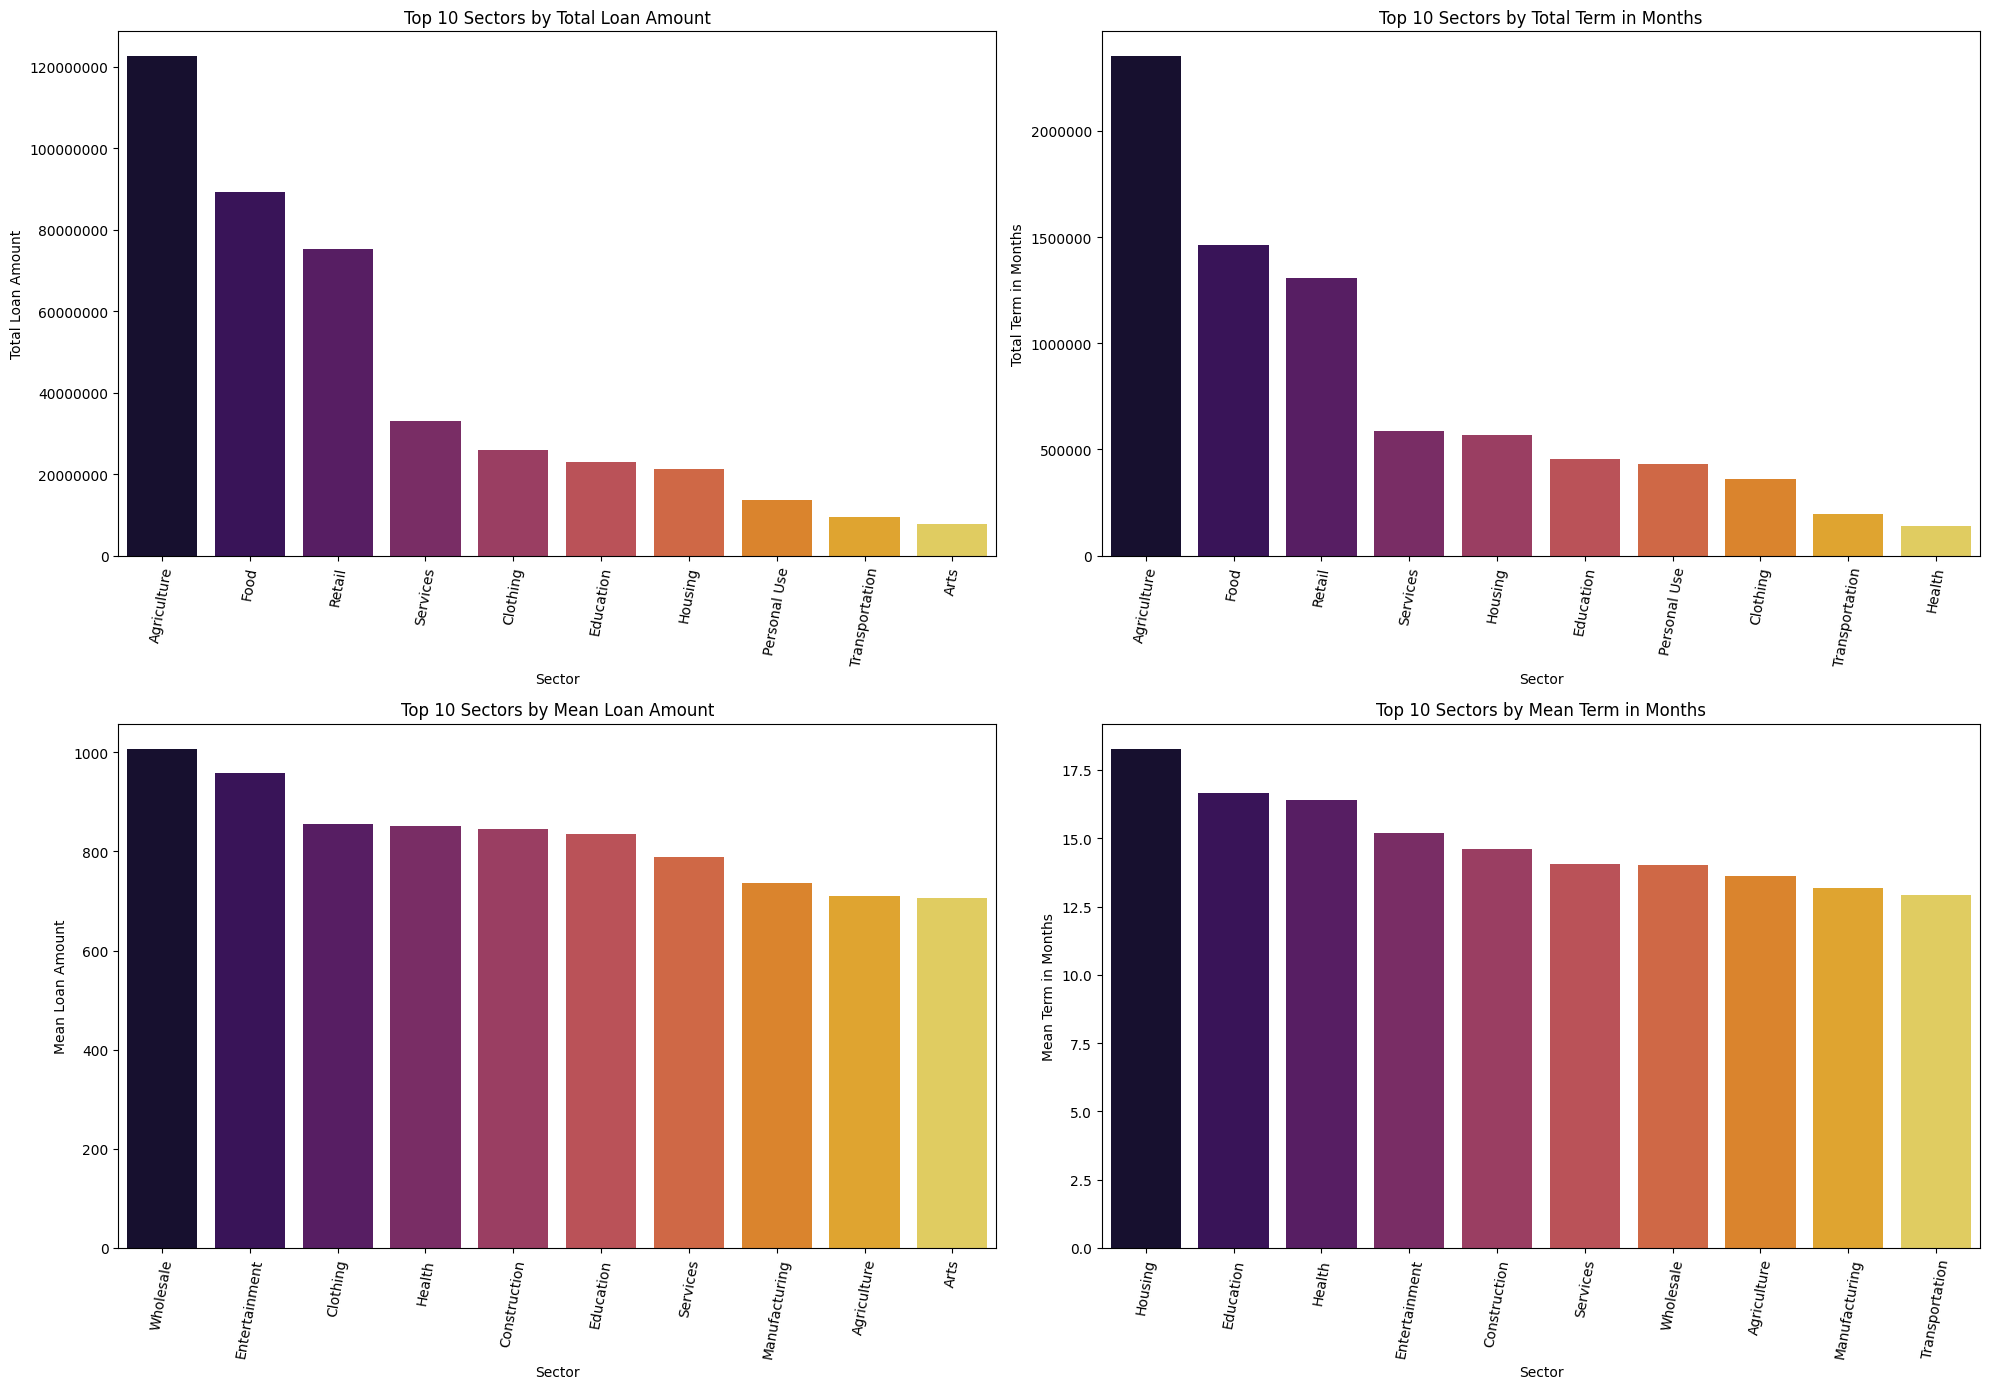

In [68]:
# Aggregating data by sector for both mean and sum Loan Amount and Term in Months
sector_summary = df.groupby('sector').agg({'loan_amount': ['mean', 'sum'], 'term_in_months': ['mean', 'sum']})

# Renaming the column names after aggregation
sector_summary.columns = ['mean_loan_amount', 'sum_loan_amount', 'mean_term_in_months', 'sum_term_in_months']

# Creating top 10 variables for both mean and sum on Loan Amount and Term in Months
top_10_sectors_mean_loan_amount = sector_summary.nlargest(10, 'mean_loan_amount')
top_10_sectors_sum_loan_amount = sector_summary.nlargest(10, 'sum_loan_amount')
top_10_sectors_mean_term_in_months = sector_summary.nlargest(10, 'mean_term_in_months')
top_10_sectors_sum_term_in_months = sector_summary.nlargest(10, 'sum_term_in_months')

# Creating a figure with four subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 14))

# Disabling scientific notation
for ax in axes.flat:
    ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
    ax.ticklabel_format(style='plain', axis='y')

# Plotting top 10 countries by sum loan amount
sns.barplot(x='sector', y='sum_loan_amount', hue='sector', data=top_10_sectors_sum_loan_amount, palette='inferno', ax=axes[0, 0], legend=False)
axes[0, 0].set_title('Top 10 Sectors by Total Loan Amount')
axes[0, 0].set_xlabel('Sector')
axes[0, 0].set_ylabel('Total Loan Amount')
axes[0, 0].tick_params(axis='x', rotation=80)

# Plotting top 10 countries by sum term in months
sns.barplot(x='sector', y='sum_term_in_months', hue='sector', data=top_10_sectors_sum_term_in_months, palette='inferno', ax=axes[0, 1], legend=False)
axes[0, 1].set_title('Top 10 Sectors by Total Term in Months')
axes[0, 1].set_xlabel('Sector')
axes[0, 1].set_ylabel('Total Term in Months')
axes[0, 1].tick_params(axis='x', rotation=80)

# Plotting top 10 countries by mean loan amount
sns.barplot(x='sector', y='mean_loan_amount', hue='sector', data=top_10_sectors_mean_loan_amount, palette='inferno', ax=axes[1, 0], legend=False)
axes[1, 0].set_title('Top 10 Sectors by Mean Loan Amount')
axes[1, 0].set_xlabel('Sector')
axes[1, 0].set_ylabel('Mean Loan Amount')
axes[1, 0].tick_params(axis='x', rotation=80)


# Plotting top 10 countries by mean term in months
sns.barplot(x='sector', y='mean_term_in_months', hue='sector', data=top_10_sectors_mean_term_in_months, palette='inferno', ax=axes[1, 1], legend=False)
axes[1, 1].set_title('Top 10 Sectors by Mean Term in Months')
axes[1, 1].set_xlabel('Sector')
axes[1, 1].set_ylabel('Mean Term in Months')
axes[1, 1].tick_params(axis='x', rotation=80)

# Adjusting the layout to be nice
plt.tight_layout()

# Calling for the plot
plt.show()


Text(0.5, 1.0, 'Correlation Matrix of KIVA Attributes')

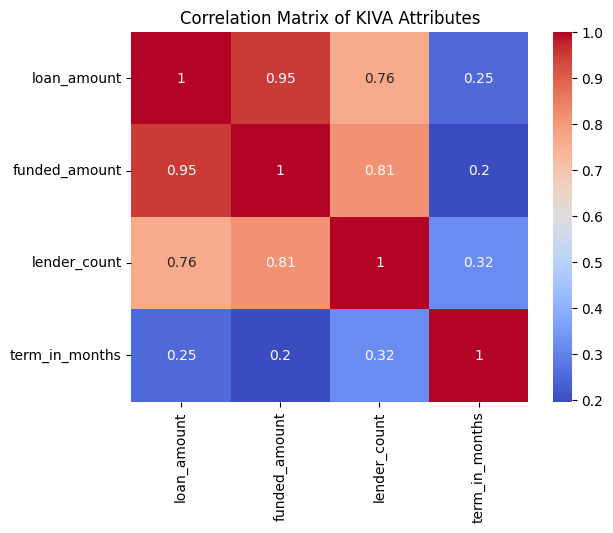

In [69]:
# Creating a pd series with Loan Amount, Funded Amount, Lender Count and Term in Months
columns = ['loan_amount', 'funded_amount', 'lender_count', 'term_in_months']

# Creating a correlation matrix with the 4 key columns chosen before
corr_matrix = df[columns].corr()

# Calling for a heatmap from the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm').set_title('Correlation Matrix of KIVA Attributes')
